In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('/home/ubuntu/fastai/')
from fastai.imports import *

/home/ubuntu/src/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.simplefilter('ignore', DeprecationWarning)

In [3]:
from fastai.learner import *

In [4]:
def lin(a, b, x): return a*x + b

In [5]:
def gen_fake_data(n, a, b):
    x = s = np.random.uniform(0, 1, n)
    y = lin(a, b, x) + 0.1 * np.random.normal(0, 3, n)
    return x, y

x, y = gen_fake_data(50, 3., 8.)

Text(0,0.5,'y')

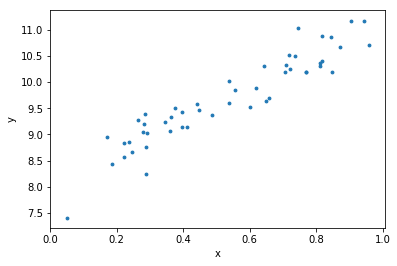

In [10]:
plt.scatter(x, y, s=8); plt.xlabel('x'); plt.ylabel('y')

In [11]:
def mse(y_hat, y): return ((y_hat - y) ** 2).mean()

In [12]:
y_hat = lin(10, 5, x)

In [13]:
mse(y_hat, y)

3.329458225077273

In [14]:
def mse_loss(a, b, x, y): return mse(lin(a, b, x), y)

In [15]:
mse_loss(10, 5, x, y)

3.329458225077273

In [16]:
x, y = gen_fake_data(10000, 3., 8.)

In [17]:
x.shape, y.shape

((10000,), (10000,))

In [18]:
x,y = V(x), V(y)

In [19]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)

In [20]:
a, b

(tensor([0.0650], device='cuda:0', requires_grad=True),
 tensor([1.7489], device='cuda:0', requires_grad=True))

In [21]:
learning_rate = 1e-3
for t in range(10000):
    loss = mse_loss(a,b,x,y)
    if t % 1000 == 0: print(loss.data[0])
        
    loss.backward()
    
    a.data -= learning_rate * a.grad.data
    b.data -= learning_rate * b.grad.data
    
    a.grad.data.zero_()
    b.grad.data.zero_()

tensor(60.4263, device='cuda:0')
tensor(0.4719, device='cuda:0')
tensor(0.0964, device='cuda:0')
tensor(0.0930, device='cuda:0')
tensor(0.0922, device='cuda:0')
tensor(0.0916, device='cuda:0')
tensor(0.0911, device='cuda:0')
tensor(0.0907, device='cuda:0')
tensor(0.0905, device='cuda:0')
tensor(0.0902, device='cuda:0')


In [23]:
def gen_fake_data2(n, a, b):
    x = s = np.random.uniform(0,1,n) 
    y = lin(a,b,x) + 0.1 * np.random.normal(0,3,n)
    return x, np.where(y>10, 1, 0).astype(np.float32)

In [24]:
x, y = gen_fake_data2(10000, 3., 8.)

In [25]:
x,y = V(x), V(y)

In [26]:
def nll(y_hat, y):
    y_hat = torch.clamp(y_hat, 1e-5, 1-1e-5)
    return (y*y_hat.log() + (1-y)*(1-y_hat).log()).mean()

In [28]:
a = V(np.random.randn(1), requires_grad=True)
b = V(np.random.randn(1), requires_grad=True)

In [ ]:
learning_rate = 1e-2

for t in range(3000):
    p = (-lin(a,b,x)).exp()
    y_hat = 1/(1+p)
    loss = nll(y_hat, y)
    
    if t % 1000 == 0:
        print(loss.data[0], np.mean(to_np(y)) == (to_np(y_hat)>0.5))
        
    lo